In [1]:
#From SAV to LOVE

# HW №3

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Задача №1

Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров. 



In [18]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [19]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def bias(y, z):
    return (y - z)

In [20]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    trees,train_errors,test_errors = [],[],[]
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        if len(trees) == 0:
            tree.fit(X_train, y_train)
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            target = gb_predict(X_train, trees, coefs, eta)
            tree.fit(X_train, bias(y_train, target))
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
    return trees, train_errors, test_errors

In [21]:
n_trees = [2,4,8,16]
max_depth = [2,4,6,8]

def make_grid(n_trees, max_depth, X_train, X_test, y_train, y_test):
    res = []
    for d in max_depth:
        for n in n_trees:
            trees, train_errors, test_errors = gb_fit(n, d, X_train, X_test, y_train, y_test, [1]*n, 1)
            res.append([n,d,train_errors.pop(), test_errors.pop()])
    return np.array(res).T

In [22]:
grid = make_grid(n_trees, max_depth, X_train, X_test, y_train, y_test)

<Figure size 432x288 with 0 Axes>

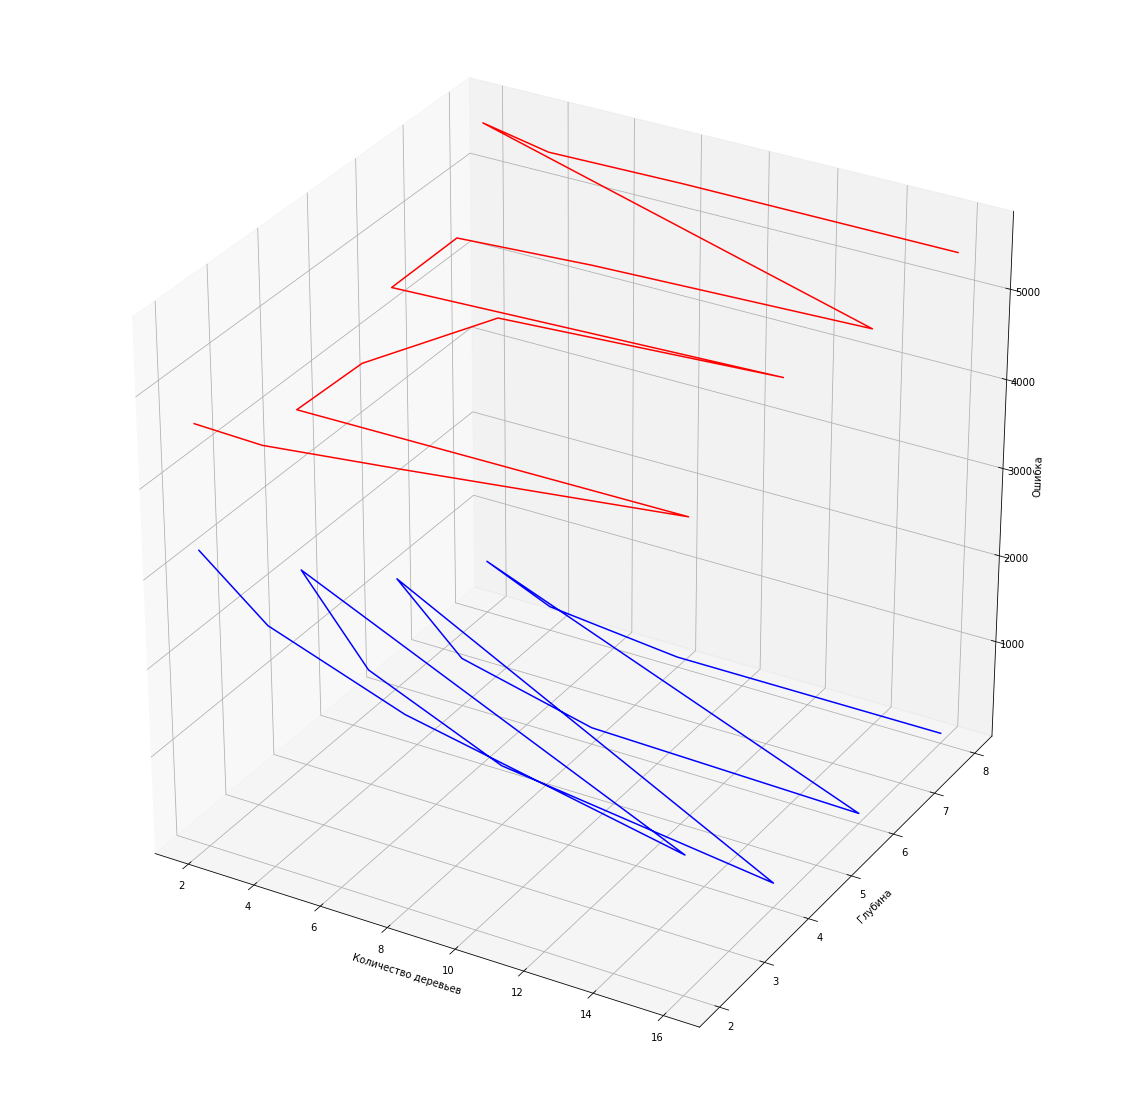

In [30]:
fig = plt.figure()
plt.figure(figsize = (20, 20))
ax = plt.axes(projection='3d')
ax.plot3D(grid[0], grid[1], grid[2],'blue') 
ax.plot3D(grid[0], grid[1], grid[3],'red')
ax.set_xlabel('Количество деревьев')
ax.set_ylabel('Глубина')
ax.set_zlabel('Ошибка')
plt.show()

Видим, что наименьшая ошибка при большем количестве деревьев, как и на тествовой так и на тренирововчной выборках. Однако с глубиной дерева, на тернировочной выборке происходит переобучение и ошибка падает, в то время как на тестовой, возврастает.

## Задача №2*

Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

## Задача №3*

Реализовать алгоритм градиетного бустинга, основанный на реализации решающего дерева из ДЗ4 / методички к уроку 4. Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1.
